In [42]:
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import tensorflow_hub as hub
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import DBSCAN, KMeans
import numpy as np
from tqdm import tqdm
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import metrics
import re

In [2]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [3]:
# The data is obtained from https://www.kaggle.com/avanisiddhapura27/resume-dataset
data = pd.read_csv('./resume_data.csv')

In [4]:
data.head()

,Resume_title,City,State,Description,work_experiences,Educations,Skills,Links,Certificates,Additional Information
0,Java Developer,Tirur,Kerala,"To prove myself dedicated, worthy and energeti...","{0: [{'wtitle:': 'Java Developer'}, {'wcompany...","{0: [{'e_title:': ""Bachelor's in Bachelor of C...","['Java (Less than 1 year)', ' Jsp (Less than 1...",['https://www.linkedin.com/in/mohamed-rihan-k-...,"{0: [{'c_title:': 'Java Developer'}, {'c_durat...",\nTechnical Expertise \n• Operating Systems: W...
1,Software Developer,Bengaluru,Karnataka,Working as Software Developer at IngroInfo Sof...,"{0: [{'wtitle:': 'JAVA DEVELOPER'}, {'wcompany...",{0: [{'e_title:': 'MCA in Master of Computer A...,"['Programming Languages: Core Java', ' J2EE \n...","['http://github.com/NK-PATEL/Train_Project', '...",{},NONE
2,Java developer,Pune,Maharashtra,Looking for a challenging career which demands...,"{0: [{'wtitle:': 'Java Developer'}, {'wcompany...","{0: [{'e_title:': ""Bachelor's in Electrical En...","['ECLIPSE (1 year)', ' HIBERNATE', ' SPRING (L...",[],{},"\nTECHNICAL SKILLS \n \nFrameworks: Spring, Sp..."
3,Seeking innovative and challenging career assi...,Pune,Maharashtra,NONE,"{0: [{'wtitle:': 'Java Developer'}, {'wcompany...","{0: [{'e_title:': 'BE in Computer'}, {'e_schoo...","['GIT', ' Angular 7', ' MAVEN', ' Java', ' Jen...",[],{},NONE
4,NONE,Pune,Maharashtra,NONE,"{0: [{'wtitle:': 'Java Developer'}, {'wcompany...",{0: [{'e_title:': 'Bachelor of Engineering in ...,['Project: HR Payroll Systems Role: Java Devel...,[],{},NONE


In [5]:
data.shape

(14804, 10)

# Feature Engineering and Data Preprocessing

In [6]:
def sentence_encoder(column_name):
    global data
    
    data[column_name] = data[column_name].apply(lambda x: str(x).lower().strip() if x!="NONE" else '' )

    data[column_name] = data[column_name].apply(lambda x: embed([x])[0].numpy())

    non_nan_embeddings = pd.DataFrame(dict(data[column_name][~data[column_name].isna()])).T

    pca = PCA(n_components=10)

    non_nan_embeddings_pca = pca.fit_transform(non_nan_embeddings)

    non_nan_embeddings_pca = pd.DataFrame(non_nan_embeddings_pca)

    non_nan_embeddings_pca.index = non_nan_embeddings.index

    non_nan_embeddings_pca.columns = [f'{column_name}_pca'+str(c) for c in non_nan_embeddings_pca.columns]

    data = data.join(non_nan_embeddings_pca,how='left')

    data.drop([column_name], axis=1, inplace=True)

In [7]:
data.head()

,Resume_title,City,State,Description,work_experiences,Educations,Skills,Links,Certificates,Additional Information
0,Java Developer,Tirur,Kerala,"To prove myself dedicated, worthy and energeti...","{0: [{'wtitle:': 'Java Developer'}, {'wcompany...","{0: [{'e_title:': ""Bachelor's in Bachelor of C...","['Java (Less than 1 year)', ' Jsp (Less than 1...",['https://www.linkedin.com/in/mohamed-rihan-k-...,"{0: [{'c_title:': 'Java Developer'}, {'c_durat...",\nTechnical Expertise \n• Operating Systems: W...
1,Software Developer,Bengaluru,Karnataka,Working as Software Developer at IngroInfo Sof...,"{0: [{'wtitle:': 'JAVA DEVELOPER'}, {'wcompany...",{0: [{'e_title:': 'MCA in Master of Computer A...,"['Programming Languages: Core Java', ' J2EE \n...","['http://github.com/NK-PATEL/Train_Project', '...",{},NONE
2,Java developer,Pune,Maharashtra,Looking for a challenging career which demands...,"{0: [{'wtitle:': 'Java Developer'}, {'wcompany...","{0: [{'e_title:': ""Bachelor's in Electrical En...","['ECLIPSE (1 year)', ' HIBERNATE', ' SPRING (L...",[],{},"\nTECHNICAL SKILLS \n \nFrameworks: Spring, Sp..."
3,Seeking innovative and challenging career assi...,Pune,Maharashtra,NONE,"{0: [{'wtitle:': 'Java Developer'}, {'wcompany...","{0: [{'e_title:': 'BE in Computer'}, {'e_schoo...","['GIT', ' Angular 7', ' MAVEN', ' Java', ' Jen...",[],{},NONE
4,NONE,Pune,Maharashtra,NONE,"{0: [{'wtitle:': 'Java Developer'}, {'wcompany...",{0: [{'e_title:': 'Bachelor of Engineering in ...,['Project: HR Payroll Systems Role: Java Devel...,[],{},NONE


In [8]:
sentence_encoder('Resume_title')
sentence_encoder('Description')
sentence_encoder('Additional Information')

Let's assume that the residence does not have impact on the level of the applicant. And let's drop city and state features.

In [9]:
data.drop(['City', 'State'], axis=1, inplace=True)

In [10]:
data.head()

,work_experiences,Educations,Skills,Links,Certificates,Resume_title_pca0,Resume_title_pca1,Resume_title_pca2,Resume_title_pca3,Resume_title_pca4,...,Additional Information_pca0,Additional Information_pca1,Additional Information_pca2,Additional Information_pca3,Additional Information_pca4,Additional Information_pca5,Additional Information_pca6,Additional Information_pca7,Additional Information_pca8,Additional Information_pca9
0,"{0: [{'wtitle:': 'Java Developer'}, {'wcompany...","{0: [{'e_title:': ""Bachelor's in Bachelor of C...","['Java (Less than 1 year)', ' Jsp (Less than 1...",['https://www.linkedin.com/in/mohamed-rihan-k-...,"{0: [{'c_title:': 'Java Developer'}, {'c_durat...",0.726666,-0.258331,0.089679,-0.382037,0.202286,...,-0.534271,0.349574,-0.100890,0.250453,-0.020005,-0.063266,-0.194934,0.093830,-0.073835,0.066735
1,"{0: [{'wtitle:': 'JAVA DEVELOPER'}, {'wcompany...",{0: [{'e_title:': 'MCA in Master of Computer A...,"['Programming Languages: Core Java', ' J2EE \n...","['http://github.com/NK-PATEL/Train_Project', '...",{},0.600140,-0.183307,-0.538826,-0.092103,-0.219645,...,0.670851,0.016126,0.002157,0.001381,-0.002381,-0.008301,-0.001086,-0.002875,-0.001744,0.000408
2,"{0: [{'wtitle:': 'Java Developer'}, {'wcompany...","{0: [{'e_title:': ""Bachelor's in Electrical En...","['ECLIPSE (1 year)', ' HIBERNATE', ' SPRING (L...",[],{},0.726665,-0.258318,0.089734,-0.382037,0.202282,...,-0.436724,0.116660,0.259500,0.211899,0.294836,0.312490,-0.209959,-0.072245,-0.003860,0.071406
3,"{0: [{'wtitle:': 'Java Developer'}, {'wcompany...","{0: [{'e_title:': 'BE in Computer'}, {'e_schoo...","['GIT', ' Angular 7', ' MAVEN', ' Java', ' Jen...",[],{},0.412929,0.426931,0.160004,0.159115,0.016508,...,0.670851,0.016127,0.002152,0.001379,-0.002376,-0.008293,-0.001086,-0.002882,-0.001767,0.000418
4,"{0: [{'wtitle:': 'Java Developer'}, {'wcompany...",{0: [{'e_title:': 'Bachelor of Engineering in ...,['Project: HR Payroll Systems Role: Java Devel...,[],{},-0.513665,-0.009335,0.003253,-0.002627,0.000530,...,0.670851,0.016127,0.002153,0.001377,-0.002380,-0.008284,-0.001084,-0.002880,-0.001767,0.000419


In [11]:
def njob(x):
    try:
        return len(eval(x))
    except:
        return -1

In [12]:
data['njob'] = data.work_experiences.apply(njob)

In [13]:
expr = []

In [14]:
for i in data.work_experiences:
    try:
        for j in eval(i).values():
            d = j[0]['wtitle:'].lower()
            expr.append(d)
        
    except Exception as e:
        pass

In [15]:
cv = CountVectorizer()
a = cv.fit_transform(expr)

In [16]:
counts = dict(zip(a.toarray().sum(axis=0), cv.get_feature_names()))

In [17]:
keys = list(counts.keys())

In [18]:
for i in keys:
    if i < 100:
        counts.pop(i)

In [19]:
expr = list(counts.values())

In [20]:
def count_stacks(x, expr):
    try:
        for j in eval(x).values():
            return j[0]['wtitle:'].count(expr)
    except Exception as e:
        pass

In [21]:
for e in tqdm(expr):
    data["expr_"+e] = data.work_experiences.apply(lambda x: count_stacks(x, e))

100%|██████████| 90/90 [01:49<00:00,  1.22s/it]


In [22]:
data.drop(['work_experiences'], axis=1, inplace=True)

In [23]:
data.head()

,Educations,Skills,Links,Certificates,Resume_title_pca0,Resume_title_pca1,Resume_title_pca2,Resume_title_pca3,Resume_title_pca4,Resume_title_pca5,...,expr_tech,expr_technical,expr_technology,expr_test,expr_tester,expr_trainee,expr_trainer,expr_ui,expr_web,expr_wordpress
0,"{0: [{'e_title:': ""Bachelor's in Bachelor of C...","['Java (Less than 1 year)', ' Jsp (Less than 1...",['https://www.linkedin.com/in/mohamed-rihan-k-...,"{0: [{'c_title:': 'Java Developer'}, {'c_durat...",0.726666,-0.258331,0.089679,-0.382037,0.202286,0.082897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,{0: [{'e_title:': 'MCA in Master of Computer A...,"['Programming Languages: Core Java', ' J2EE \n...","['http://github.com/NK-PATEL/Train_Project', '...",{},0.600140,-0.183307,-0.538826,-0.092103,-0.219645,0.165261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"{0: [{'e_title:': ""Bachelor's in Electrical En...","['ECLIPSE (1 year)', ' HIBERNATE', ' SPRING (L...",[],{},0.726665,-0.258318,0.089734,-0.382037,0.202282,0.082903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"{0: [{'e_title:': 'BE in Computer'}, {'e_schoo...","['GIT', ' Angular 7', ' MAVEN', ' Java', ' Jen...",[],{},0.412929,0.426931,0.160004,0.159115,0.016508,-0.085849,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,{0: [{'e_title:': 'Bachelor of Engineering in ...,['Project: HR Payroll Systems Role: Java Devel...,[],{},-0.513665,-0.009335,0.003253,-0.002627,0.000530,0.000822,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
def is_educ(x, level):
    try:
        for j in eval(x).values():
            d = j[0]['e_title:'].lower()
            if d.find(level) > -1:
                return 1
            else:
                continue
        return 0
    except Exception as e:
        pass

In [25]:
data['bachelor'] = data.Educations.apply(lambda x: is_educ(x, 'bachelor'))
data['master'] = data.Educations.apply(lambda x: is_educ(x, 'master'))

In [26]:
data.drop(['Educations'],axis=1, inplace=True)

In [27]:
data.head()

,Skills,Links,Certificates,Resume_title_pca0,Resume_title_pca1,Resume_title_pca2,Resume_title_pca3,Resume_title_pca4,Resume_title_pca5,Resume_title_pca6,...,expr_technology,expr_test,expr_tester,expr_trainee,expr_trainer,expr_ui,expr_web,expr_wordpress,bachelor,master
0,"['Java (Less than 1 year)', ' Jsp (Less than 1...",['https://www.linkedin.com/in/mohamed-rihan-k-...,"{0: [{'c_title:': 'Java Developer'}, {'c_durat...",0.726666,-0.258331,0.089679,-0.382037,0.202286,0.082897,0.104706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,"['Programming Languages: Core Java', ' J2EE \n...","['http://github.com/NK-PATEL/Train_Project', '...",{},0.600140,-0.183307,-0.538826,-0.092103,-0.219645,0.165261,0.177559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,"['ECLIPSE (1 year)', ' HIBERNATE', ' SPRING (L...",[],{},0.726665,-0.258318,0.089734,-0.382037,0.202282,0.082903,0.104740,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,"['GIT', ' Angular 7', ' MAVEN', ' Java', ' Jen...",[],{},0.412929,0.426931,0.160004,0.159115,0.016508,-0.085849,0.019072,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,['Project: HR Payroll Systems Role: Java Devel...,[],{},-0.513665,-0.009335,0.003253,-0.002627,0.000530,0.000822,0.002102,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
data['nskills'] = data.Skills.apply(njob)

In [29]:
skills = []

In [30]:
for i in data.Skills:
    try:
        skills.extend([re.sub(r"\s\(.*\)$","", x).strip().lower() for x in eval(i)])
        
    except Exception as e:
        pass

In [31]:
elems, counts = np.unique(skills, return_counts=True)

In [32]:
top_skills = elems[counts>100]

In [33]:
def count_skills(x, skill):
    try:
        if skill in [re.sub(r"\s\(.*\)$","", a).strip().lower() for a in eval(x)]:
            return 1
        else:
            return 0

    except Exception as e:
        pass

In [34]:
for s in tqdm(top_skills):
    data["skill_"+s] = data.Skills.apply(lambda x: count_skills(x, s))

100%|██████████| 105/105 [00:51<00:00,  2.03it/s]


In [35]:
data.drop(['Skills'], axis=1, inplace=True)

In [36]:
data

,Links,Certificates,Resume_title_pca0,Resume_title_pca1,Resume_title_pca2,Resume_title_pca3,Resume_title_pca4,Resume_title_pca5,Resume_title_pca6,Resume_title_pca7,...,skill_tableau,skill_tally,skill_tensorflow,skill_typescript,skill_unix,skill_visual studio,skill_web development,skill_windows,skill_wordpress,skill_xml
0,['https://www.linkedin.com/in/mohamed-rihan-k-...,"{0: [{'c_title:': 'Java Developer'}, {'c_durat...",0.726666,-0.258331,0.089679,-0.382037,0.202286,0.082897,0.104706,0.230661,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"['http://github.com/NK-PATEL/Train_Project', '...",{},0.600140,-0.183307,-0.538826,-0.092103,-0.219645,0.165261,0.177559,-0.000142,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,[],{},0.726665,-0.258318,0.089734,-0.382037,0.202282,0.082903,0.104740,0.230628,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,[],{},0.412929,0.426931,0.160004,0.159115,0.016508,-0.085849,0.019072,0.169508,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,[],{},-0.513665,-0.009335,0.003253,-0.002627,0.000530,0.000822,0.002102,-0.004792,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14799,['http://www.linkedin.com/in/akhil-ravi-1512b6...,{0: [{'c_title:': 'ISO 9001:2018 QMS INTERNAL ...,0.521554,0.264012,-0.061735,0.172247,0.257009,0.030422,-0.239936,0.109073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14800,[],{},-0.513665,-0.009335,0.003253,-0.002627,0.000534,0.000819,0.002096,-0.004790,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14801,[],{},-0.513665,-0.009335,0.003253,-0.002627,0.000534,0.000819,0.002096,-0.004790,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14802,[],{},-0.513665,-0.009335,0.003253,-0.002627,0.000534,0.000819,0.002096,-0.004790,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
data['nlinks'] = data.Links.apply(njob)

In [38]:
data['ncerts'] = data.Certificates.apply(njob)

In [39]:
data.drop(['Certificates', 'Links'], axis=1, inplace=True)

In [40]:
data.dropna(inplace=True)

## FE II

<AxesSubplot:>

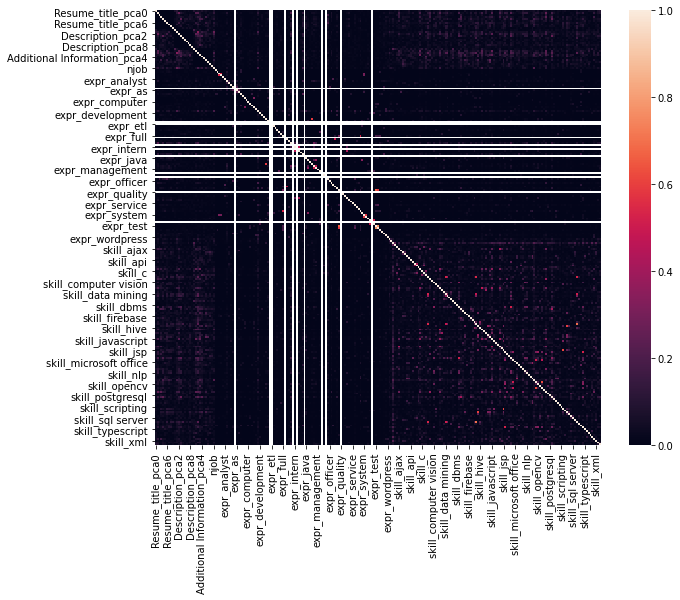

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(abs(data.corr()), vmin=0, vmax=1)

In [44]:
dd = abs(data.corr())

In [45]:
dd = dd - np.eye(dd.shape[1])

In [46]:
dd = dd[dd <= 0.9]

In [47]:
dd.dropna(how='all', inplace=True)

In [48]:
new_cols = list(dd.index)

In [49]:
data = data.loc[:, new_cols]

<AxesSubplot:>

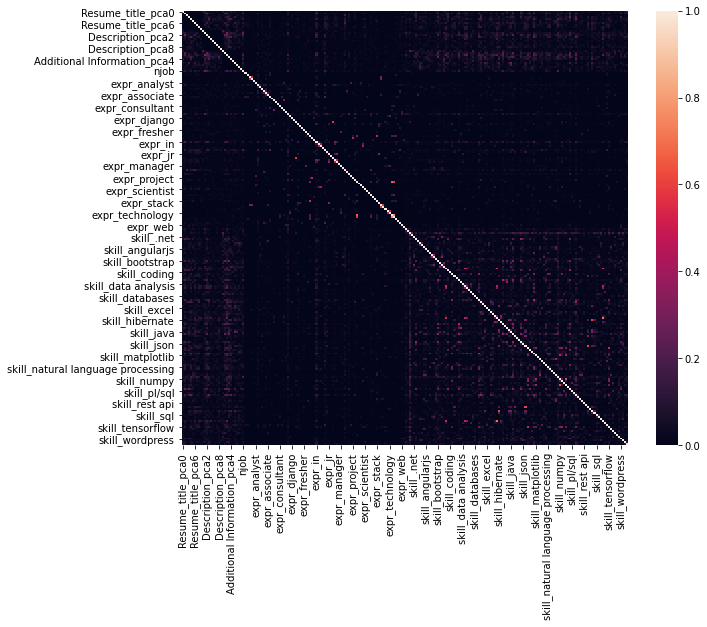

In [50]:
plt.figure(figsize=(10,8))
sns.heatmap(abs(data.corr()), vmin=0, vmax=1)

# Model

In [51]:
scaler = StandardScaler()

In [52]:
d = scaler.fit_transform(data)

In [53]:
silh_scores  = []
dist = []

In [54]:
n_clusters = [2,3,4,5,6,7,8,10,15,20, 30, 50]

In [55]:
for i in n_clusters:
    model = KMeans(n_clusters=i, random_state=1)
    model.fit(d)
    s = metrics.silhouette_score(d, model.labels_)
    dist.append(model.inertia_)
    silh_scores.append(s)

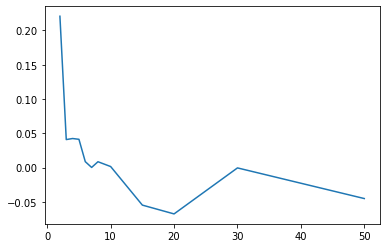

In [56]:
plt.plot(n_clusters, silh_scores)

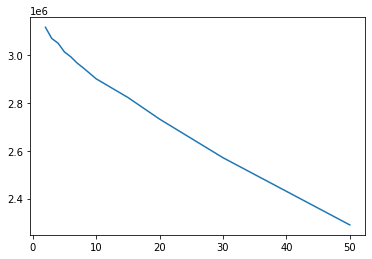

In [57]:
plt.plot(n_clusters, dist)

In [58]:
n_clusters[np.argmax(silh_scores)]

2

In [59]:
model = KMeans(n_clusters=n_clusters[np.argmax(silh_scores)], random_state=1)
model.fit(d)

KMeans(n_clusters=2, random_state=1)

In [60]:
pca = PCA(n_components=10)

In [61]:
d = pca.fit_transform(d)

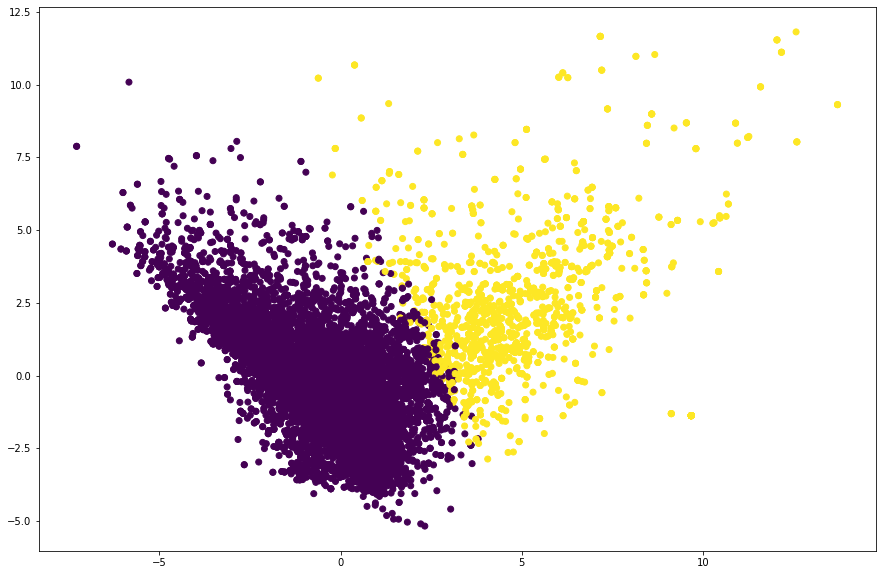

In [62]:
plt.figure(figsize=(15,10))
plt.scatter(d[:,0], d[:,1], c=np.array(model.labels_))

# Interpretation

In [66]:
data.columns

Index(['Resume_title_pca0', 'Resume_title_pca1', 'Resume_title_pca2',
       'Resume_title_pca3', 'Resume_title_pca4', 'Resume_title_pca5',
       'Resume_title_pca6', 'Resume_title_pca7', 'Resume_title_pca8',
       'Resume_title_pca9',
       ...
       'skill_tensorflow', 'skill_typescript', 'skill_unix',
       'skill_visual studio', 'skill_web development', 'skill_windows',
       'skill_wordpress', 'skill_xml', 'nlinks', 'ncerts'],
      dtype='object', length=220)

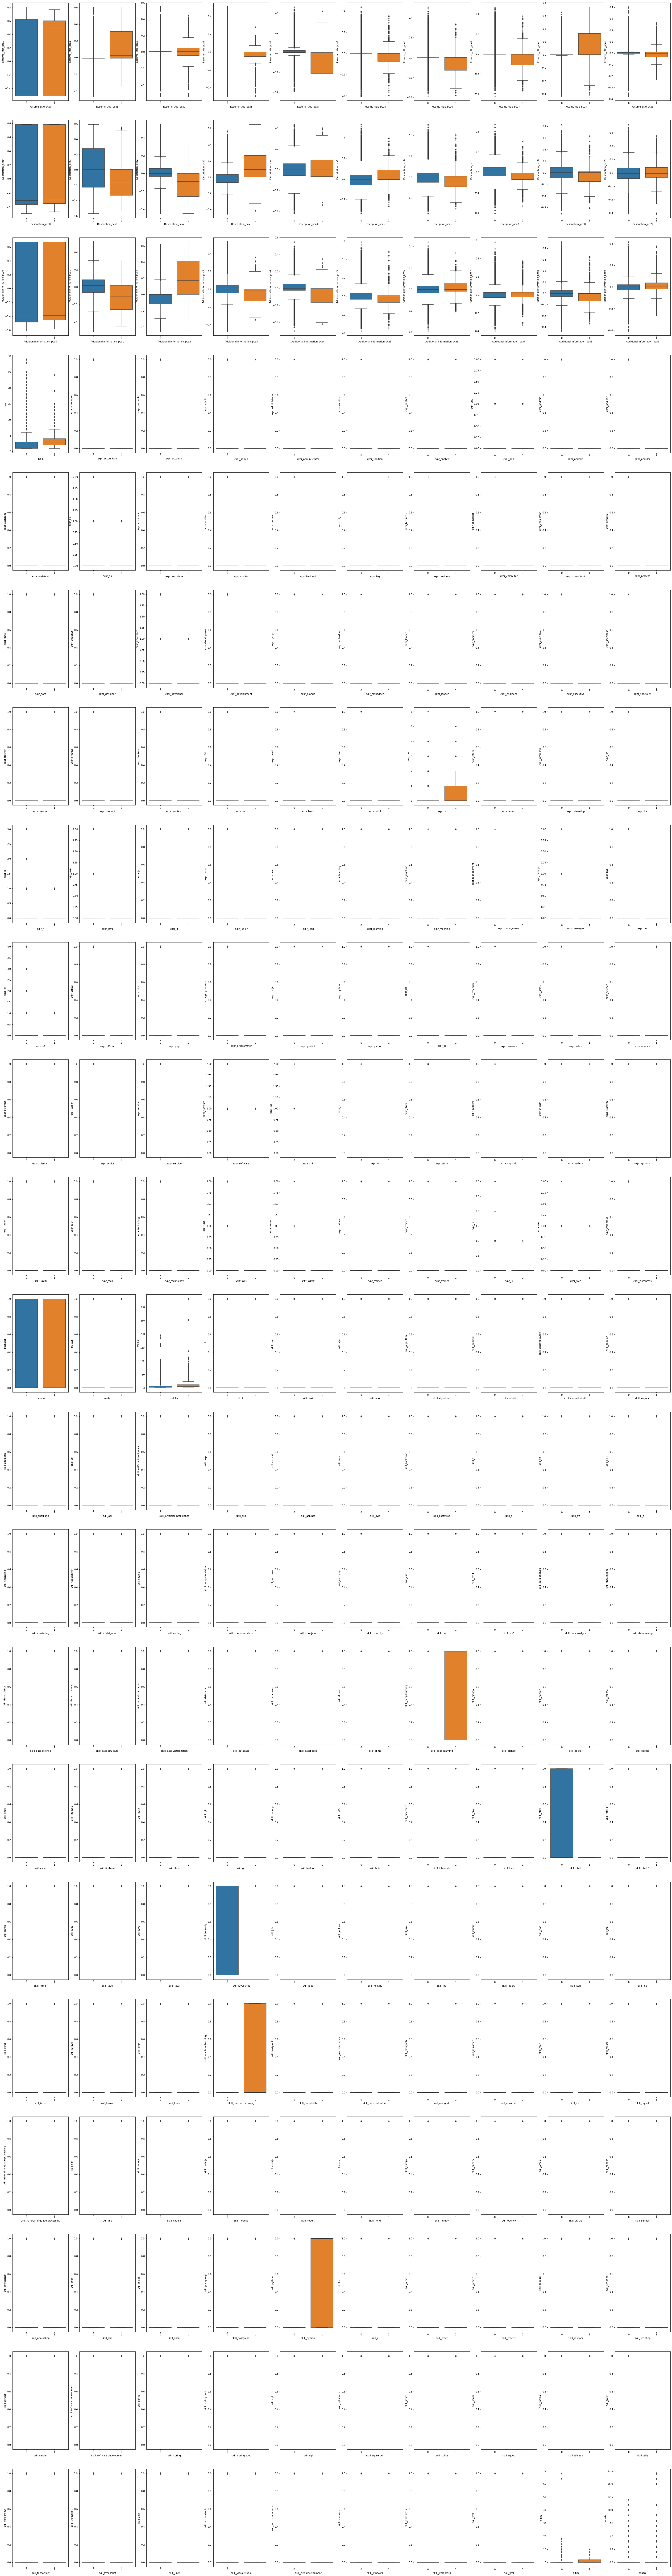

In [63]:
fig, axs = plt.subplots(22,10, figsize=(50, 200))
k = 0
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):   
        sns.boxplot(x=model.labels_, y = data.iloc[:,k], ax=axs[i,j])
        axs[i,j].set_xlabel(data.columns[k])
        k+=1        
        if k >= data.shape[1]:
            break


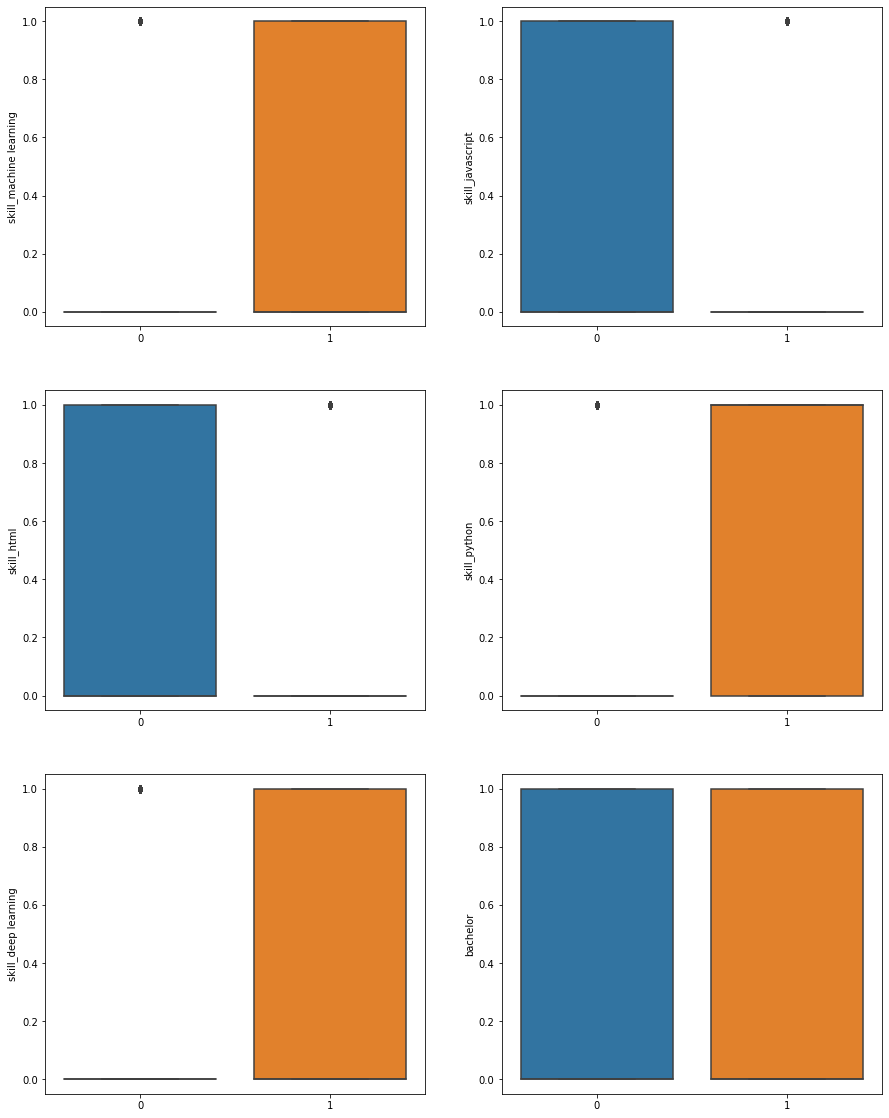

In [80]:
fig, axs = plt.subplots(3,2, figsize=(15, 20))

sns.boxplot(x=model.labels_, y = data.loc[:,'skill_machine learning'], ax=axs[0,0])
sns.boxplot(x=model.labels_, y = data.loc[:,'skill_python'], ax=axs[1,1])
sns.boxplot(x=model.labels_, y = data.loc[:,'skill_deep learning'], ax=axs[2,0])
sns.boxplot(x=model.labels_, y = data.loc[:,'skill_javascript'], ax=axs[0,1])
sns.boxplot(x=model.labels_, y = data.loc[:,'skill_html'], ax=axs[1,0])
sns.boxplot(x=model.labels_, y = data.loc[:,'bachelor'], ax=axs[2,1])

In [81]:
cl = DecisionTreeClassifier(max_depth=5)

In [82]:
cl.fit(data, model.labels_)

DecisionTreeClassifier(max_depth=5)

In [83]:
cl.score(data, model.labels_)

0.970751316883837

In [84]:
def plot_feature_importances(features, importances):
    d = zip(importances, features)
    d = dict(sorted(d, reverse=True))

    plt.figure(figsize=(15,10))
    plt.bar(d.values(), d.keys())
    plt.xticks(rotation=90)    

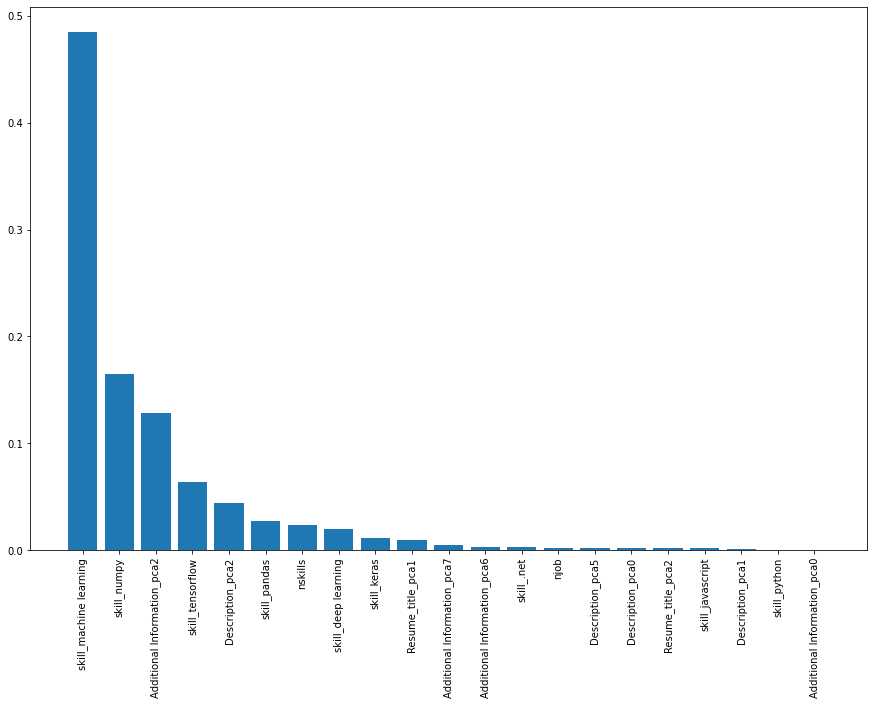

In [85]:
plot_feature_importances(data.columns, cl.feature_importances_)